In [14]:
# define derivative function
from typing import Callable
from numpy import ndarray
import numpy as np

def deriv(func: Callable[[ndarray],
                          ndarray],
                          input_: ndarray,
                          delta: float = 0.001) -> ndarray:
    return ((func(input_ + delta) - func(input_ - delta)) / (delta*2))

In [15]:
# define chain rule function
from typing import List


Array_Function = Callable[[ndarray], ndarray]
# A chain is a list of functions
Chain = List[Array_Function]

def chain_length_2(chain: Chain,
                   a: ndarray) ->ndarray:
    assert len(chain) == 2

    f1 = chain[0]
    f2 = chain[1]

    return f2(f1(a))

In [16]:
# signoid function 
def sigmoid(x: ndarray) -> ndarray:
    return 1 / (1 + np.exp(-x))

def square(x: ndarray) -> ndarray:
    return np.power(x, 2)

In [19]:
def chain_deriv_2(chain: Chain,
                  input_range: ndarray) ->  ndarray:
    assert len(chain) == 2
    assert input_range.ndim == 1

    f1 = chain[0]
    f2 = chain[1]

    #df1/dx 
    df1dx = deriv(f1, input_ = input_range)

    #df2/du(f1(x))
    df2du = deriv(f2, f1(input_range))

    return df1dx * df2du

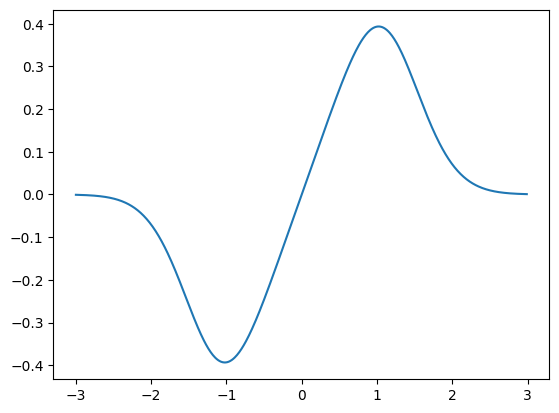

In [24]:
# plot the graph
import matplotlib.pyplot as plt

PLOT_RANGE = np.arange(-3, 3, 0.01)

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

y1 = chain_deriv_2(chain=chain_1, input_range=PLOT_RANGE)
y2 = chain_deriv_2(chain=chain_2, input_range=PLOT_RANGE)

plt.plot(PLOT_RANGE, y1)